# 통신사 데이터EDA

In [1]:
# 패키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 엑셀 파일에서는 필터링이 된 형태로 저장이 되어있길래 pandas로 불러올때 unnamed 컬럼이 다수 존재
* 필터링된 데이터에서 빈 컬럼을 제거한 데이터를 불러오는게 아닌 전체데이터에서 필요 컬럼만 불러옴
* 따라서 필터링 후 빈 컬럼을 제거한 데이터셋과 비교했을때 차이가 있을것으로 예상
* 이 경우에는 별도로 데이터를 저장하여 사용하면 되므로 추후에 수정 가능할듯

In [2]:
# 통신사 데이터 불러오기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플\파이널프로젝트 데이터/202211_202301_통신정보(쇼핑전처리).xlsx'
df = pd.read_excel(excelFile, usecols = 'A:L')
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%"
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00


In [3]:
# 데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   행정동코드                   10176 non-null  int64  
 1   자치구                     10176 non-null  object 
 2   행정동                     10176 non-null  object 
 3   성별                      10176 non-null  int64  
 4   연령대                     10176 non-null  int64  
 5   총인구수                    10176 non-null  float64
 6   1인가구수                   10176 non-null  float64
 7   쇼핑 서비스 사용 미추정 인구수       10176 non-null  float64
 8   쇼핑 서비스 사용일수             10176 non-null  float64
 9   쇼핑 서비스 사용일수: 4분위수, 25%  10176 non-null  float64
 10  쇼핑 서비스 사용일수: 4분위수, 50%  10176 non-null  float64
 11  쇼핑 서비스 사용일수: 4분위수, 75%  10176 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 954.1+ KB


## 총인구수와 1인가구수

* 시각화는 일단 파이차트 위주로 진행했지만 추후에 더 직관적인 그래프로 수정 가능

In [4]:
# 자치구별 총인구수 합계
result1 = df[['자치구', '총인구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '총인구수', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,총인구수
0,송파구,528482.22
1,강서구,467858.93
2,노원구,448140.80
3,관악구,447628.06
4,강남구,438342.97
5,은평구,391502.98
6,성북구,373924.02
7,구로구,370283.54
8,양천구,368116.85
9,강동구,365204.32


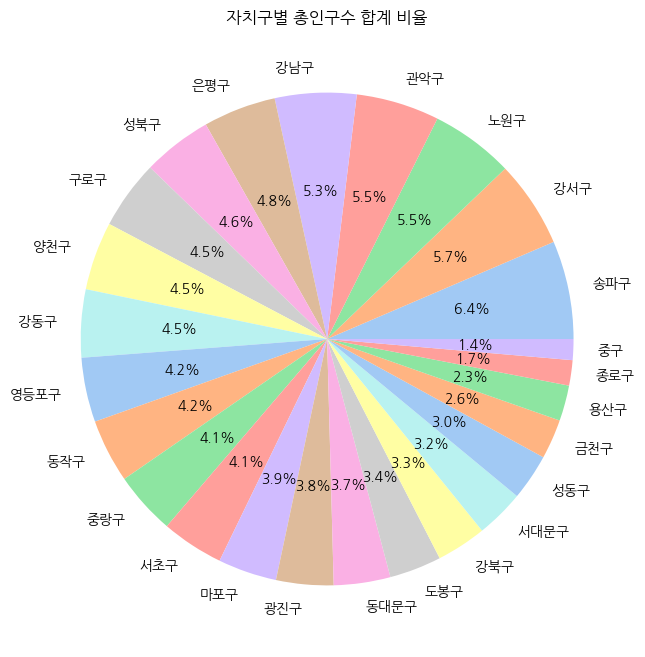

In [5]:
# 자치구별 총인구수 합계비율 파이차트
sns.set_palette("pastel")
plt.figure(figsize = (10, 8))
plt.pie(result1['총인구수'], labels = result1['자치구'], autopct='%1.1f%%')
plt.title('자치구별 총인구수 합계 비율')
plt.show()

In [6]:
# 자치구별 1인 가구수 합계
result2 = df[['자치구', '1인가구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '1인가구수', ascending = False).reset_index(drop = True)
result2.head(10)

,자치구,1인가구수
0,관악구,140447.33
1,강서구,83887.16
2,강남구,83017.11
3,송파구,79947.04
4,영등포구,73849.38
5,광진구,72089.47
6,마포구,70558.84
7,동작구,69772.56
8,동대문구,68411.59
9,성북구,65850.52


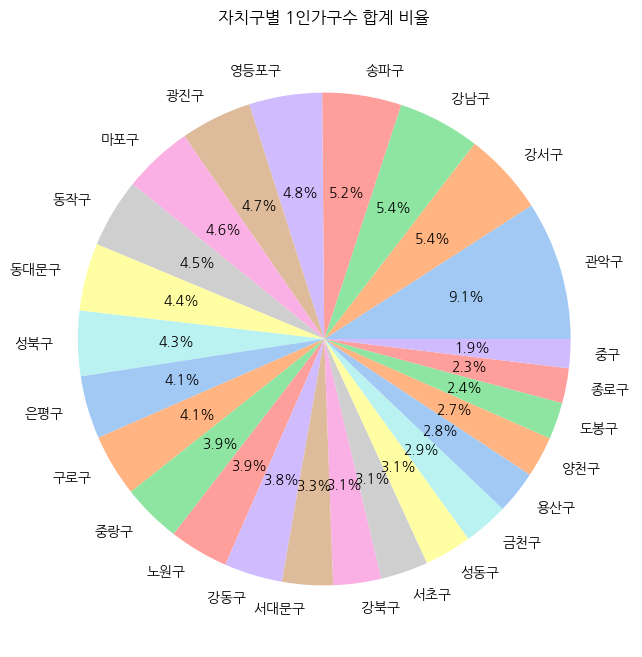

In [7]:
# 자치구별 1인가구수 합계비율 파이차트
sns.set_palette("pastel")
plt.figure(figsize = (10, 8))
plt.pie(result2['1인가구수'], labels = result2['자치구'], autopct='%1.1f%%')
plt.title('자치구별 1인가구수 합계 비율')
plt.show()

* 성별 구분이 보편적으로 0, 1로 구분되던 데이터셋들과 달리 여기선 1, 2로 구분됨
* 여기선 2가 여성이고 1이 남성이다.

In [8]:
# 성별 총인구수 합계
result3 = df[['성별', '총인구수']].groupby(['성별'], as_index = False).sum().sort_values(by = '총인구수', ascending = False).reset_index(drop = True)
result3

,성별,총인구수
0,2,4214429.76
1,1,3985424.88


In [9]:
# 성별 1인 가구수 합계
result3 = df[['성별', '1인가구수']].groupby(['성별'], as_index = False).sum().sort_values(by = '1인가구수', ascending = False).reset_index(drop = True)
result3

,성별,1인가구수
0,2,808916.64
1,1,731924.67


In [10]:
# 새로운 연령대 범주
def category_year(myYear):
    if myYear < 30:
        return '20세이상 30세 미만'
    elif myYear < 40:
        return '30세이상 40세 미만'
    elif myYear < 50:
        return '40세이상 50세 미만'
    elif myYear < 60:
        return '50세이상 60세 미만'
    elif myYear < 70:
        return '60세이상 70세 미만'
    else:
        return '70세 이상'

In [11]:
# 함수에 적용하여 새 컬럼 생성
df['New_year'] = df['연령대'].apply(lambda x: category_year(x))

In [12]:
df.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,쇼핑 서비스 사용 미추정 인구수,쇼핑 서비스 사용일수,"쇼핑 서비스 사용일수: 4분위수, 25%","쇼핑 서비스 사용일수: 4분위수, 50%","쇼핑 서비스 사용일수: 4분위수, 75%",New_year
0,1125070,강동구,둔촌1동,2,25,586.00,319.71,0.00,141.43,50.00,158.33,208.33,20세이상 30세 미만
1,1102060,중구,을지로동,2,50,51.00,23.31,18.31,102.00,13.33,81.67,163.33,50세이상 60세 미만
2,1125070,강동구,둔촌1동,1,25,740.00,355.32,52.86,127.95,43.33,81.67,201.67,20세이상 30세 미만
3,1102057,중구,필동,2,75,152.00,61.90,82.61,34.21,3.33,18.33,30.00,70세 이상
4,1101067,종로구,창신1동,1,70,108.59,48.88,55.50,34.17,3.33,10.00,35.00,70세 이상


In [13]:
# 연령별 총인구수 합계
result4 = df[['New_year', '총인구수']].groupby(['New_year'], as_index = False).sum().sort_values(by = '총인구수', ascending = False).reset_index(drop = True)
result4

,New_year,총인구수
0,40세이상 50세 미만,1668187.77
1,30세이상 40세 미만,1654814.28
2,50세이상 60세 미만,1594762.00
3,20세이상 30세 미만,1479144.83
4,60세이상 70세 미만,1033734.11
5,70세 이상,769211.65


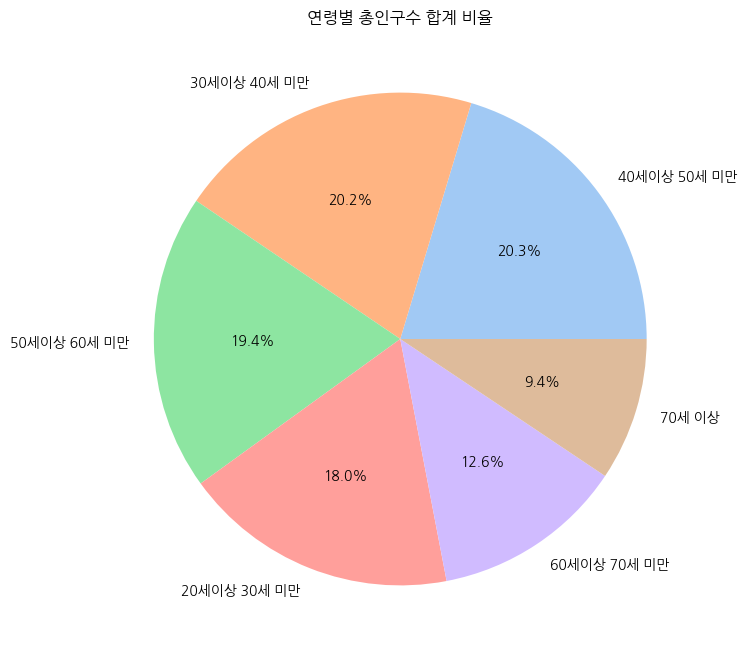

In [14]:
# 연령별 총인구수 합계비율 파이차트
plt.figure(figsize = (10, 8))
plt.pie(result4['총인구수'], labels = result4['New_year'], autopct='%1.1f%%')
plt.title('연령별 총인구수 합계 비율')
plt.show()

In [15]:
# 연령별 1인가구수 합계
result5 = df[['New_year', '1인가구수']].groupby(['New_year'], as_index = False).sum().sort_values(by = '1인가구수', ascending = False).reset_index(drop = True)
result5

,New_year,1인가구수
0,20세이상 30세 미만,386891.43
1,30세이상 40세 미만,376753.59
2,40세이상 50세 미만,217177.25
3,70세 이상,214540.38
4,50세이상 60세 미만,188150.87
5,60세이상 70세 미만,157327.79


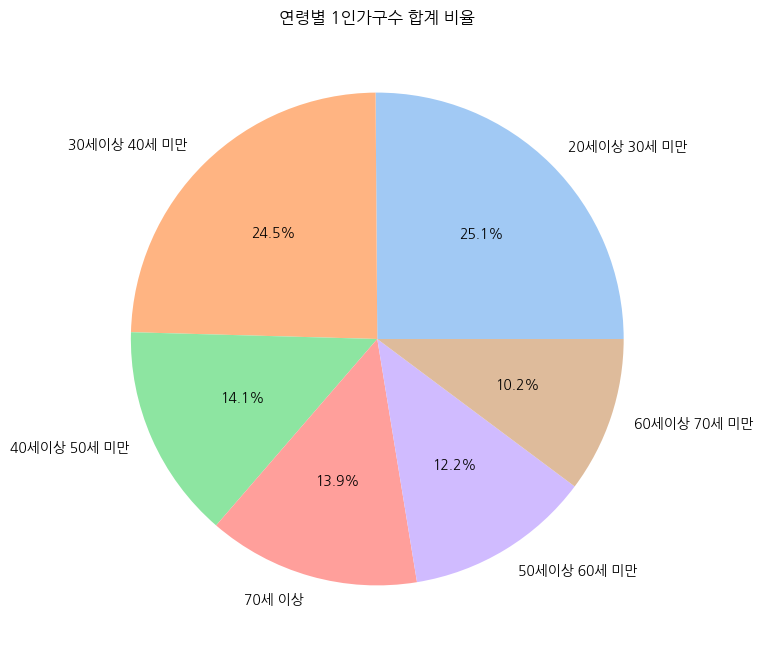

In [16]:
# 연령별 1인가구수 합계비율 파이차트
plt.figure(figsize = (10, 8))
plt.pie(result5['1인가구수'], labels = result5['New_year'], autopct='%1.1f%%')
plt.title('연령별 1인가구수 합계 비율')
plt.show()

## 쇼핑 사용 미추정 인구수

In [17]:
# 자치구별 쇼핑 서비스 사용 미추정 인구수 합계
result1 = df[['자치구', '쇼핑 서비스 사용 미추정 인구수']].groupby(['자치구'], as_index = False).sum().sort_values(by = '쇼핑 서비스 사용 미추정 인구수', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,쇼핑 서비스 사용 미추정 인구수
0,관악구,51953.23
1,노원구,51909.96
2,강서구,51839.05
3,송파구,51124.59
4,은평구,49647.36
5,구로구,47592.62
6,성북구,46827.66
7,중랑구,45415.09
8,강남구,42802.62
9,영등포구,42278.57


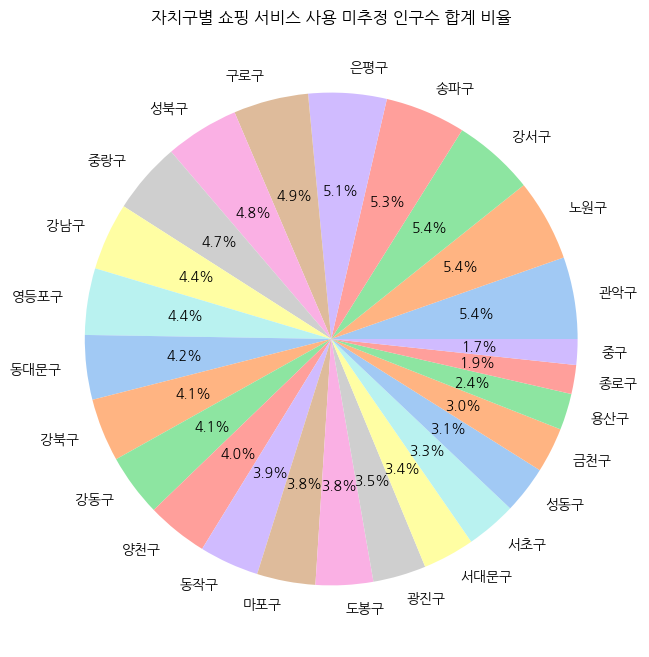

In [18]:
# 자치구별 쇼핑 서비스 사용 미추정 인구수 합계비율 파이차트
plt.figure(figsize = (10, 8))
plt.pie(result1['쇼핑 서비스 사용 미추정 인구수'], labels = result1['자치구'], autopct='%1.1f%%')
plt.title('자치구별 쇼핑 서비스 사용 미추정 인구수 합계 비율')
plt.show()

In [19]:
# 성별 1인 가구수 합계
result2 = df[['성별', '쇼핑 서비스 사용 미추정 인구수']].groupby(['성별'], as_index = False).sum().sort_values(by = '쇼핑 서비스 사용 미추정 인구수', ascending = False).reset_index(drop = True)
result2

,성별,쇼핑 서비스 사용 미추정 인구수
0,1,486710.84
1,2,481154.28


In [20]:
# 연령대별 쇼핑 사용 미추정 인구수 비율
result3 = df[['New_year', '쇼핑 서비스 사용 미추정 인구수']].groupby(['New_year'], as_index = False).sum().sort_values(by = '쇼핑 서비스 사용 미추정 인구수', ascending = False).reset_index(drop = True)
result3

,New_year,쇼핑 서비스 사용 미추정 인구수
0,70세 이상,388968.08
1,60세이상 70세 미만,174450.26
2,50세이상 60세 미만,140372.86
3,40세이상 50세 미만,125906.72
4,30세이상 40세 미만,100003.53
5,20세이상 30세 미만,38163.67


## 쇼핑 서비스 사용일수

In [21]:
# 자치구별 평균 쇼핑 서비스 사용일수
result4 = round(df[['자치구', '쇼핑 서비스 사용일수']].groupby(['자치구'], as_index = False).mean().sort_values(by = '쇼핑 서비스 사용일수', ascending = False).reset_index(drop = True), 2)
result4.head(10)

,자치구,쇼핑 서비스 사용일수
0,은평구,122.47
1,노원구,122.36
2,도봉구,122.07
3,강북구,121.84
4,강서구,121.80
5,영등포구,121.66
6,용산구,121.64
7,동대문구,121.08
8,성동구,120.85
9,성북구,120.84


In [22]:
# 성별 평균쇼핑 서비스 사용일수
result5 = round(df[['성별', '쇼핑 서비스 사용일수']].groupby(['성별'], as_index = False).mean().sort_values(by = '쇼핑 서비스 사용일수', ascending = False).reset_index(drop = True), 2)
result5

,성별,쇼핑 서비스 사용일수
0,2,126.53
1,1,114.11


In [23]:
# 연령대별 평균쇼핑 서비스 사용일수
result6 = round(df[['New_year', '쇼핑 서비스 사용일수']].groupby(['New_year'], as_index = False).mean().sort_values(by = '쇼핑 서비스 사용일수', ascending = False).reset_index(drop = True), 2)
result6

,New_year,쇼핑 서비스 사용일수
0,30세이상 40세 미만,187.79
1,40세이상 50세 미만,181.03
2,20세이상 30세 미만,133.38
3,50세이상 60세 미만,118.87
4,60세이상 70세 미만,65.24
5,70세 이상,35.60


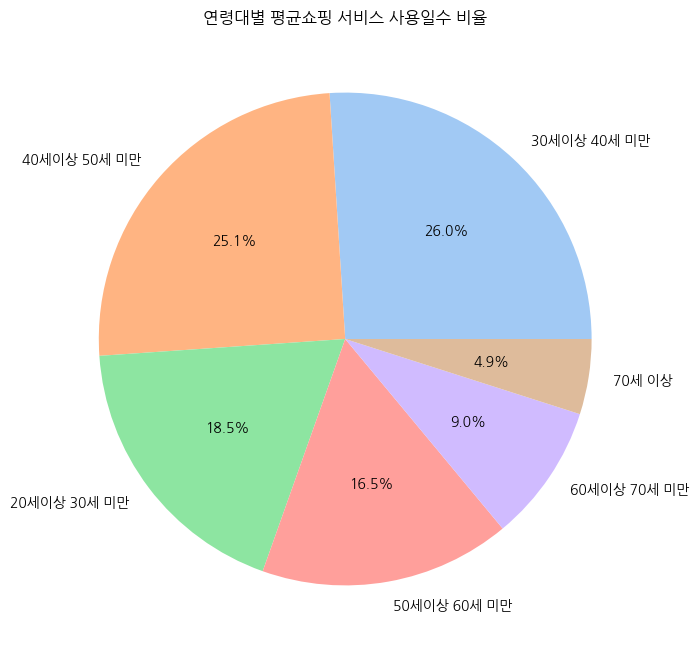

In [24]:
# 연령대별 평균쇼핑 서비스 사용일수 파이차트
plt.figure(figsize = (10, 8))
plt.pie(result6['쇼핑 서비스 사용일수'], labels = result6['New_year'], autopct='%1.1f%%')
plt.title('연령대별 평균쇼핑 서비스 사용일수 비율')
plt.show()

# 택배 데이터EDA

In [25]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/자치구단위 월별 택배 도착지 데이터.csv'
df2 = pd.read_csv(csvFile, encoding = 'euc-kr')
df2.head()

,기준년월(BASE_DY),자치구(ADDR),대분류_착지물동량_가구/인테리어(E_C_01),대분류_착지물동량_기타(E_C_02),대분류_착지물동량_도서/음반(E_C_03),대분류_착지물동량_디지털/가전(E_C_04),대분류_착지물동량_생활/건강(E_C_05),대분류_착지물동량_스포츠/레저(E_C_06),대분류_착지물동량_식품(E_C_07),대분류_착지물동량_출산/육아(E_C_08),...,중분류_착지물동량_스킨케어(E_C_11_09),중분류_착지물동량_클렌징(E_C_11_10),중분류_착지물동량_향수(E_C_11_11),중분류_착지물동량_헤어스타일링(E_C_11_12),중분류_착지물동량_헤어케어(E_C_11_13),Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146
0,202103,강남구,25035.0,281991.0,27333.0,51770.0,198635.0,13054,173813,14363,...,25652,9804,2174,3588,5058,NaN,NaN,NaN,NaN,NaN
1,202104,서초구,19508.0,259466.0,48374.0,38415.0,165677.0,17343,175048,12809,...,16368,8505,1938,3307,12029,NaN,NaN,NaN,NaN,NaN
2,202105,서대문구,16904.0,384154.0,29689.0,46772.0,76597.0,17717,466881,14987,...,18570,5389,1509,2114,11127,NaN,NaN,NaN,NaN,NaN
3,202102,강서구,46705.0,216690.0,49027.0,30791.0,292619.0,12504,161749,8194,...,27236,7376,2187,1101,13519,NaN,NaN,NaN,NaN,NaN
4,202102,성동구,35119.0,240743.0,94856.0,88985.0,158192.0,16432,262624,11800,...,33971,5788,1853,3256,7275,NaN,NaN,NaN,NaN,NaN


In [26]:
df2.columns

Index(['기준년월(BASE_DY)', '자치구(ADDR)', '대분류_착지물동량_가구/인테리어(E_C_01)',
       '대분류_착지물동량_기타(E_C_02)', '대분류_착지물동량_도서/음반(E_C_03)',
       '대분류_착지물동량_디지털/가전(E_C_04)', '대분류_착지물동량_생활/건강(E_C_05)',
       '대분류_착지물동량_스포츠/레저(E_C_06)', '대분류_착지물동량_식품(E_C_07)',
       '대분류_착지물동량_출산/육아(E_C_08)',
       ...
       '중분류_착지물동량_스킨케어(E_C_11_09)', '중분류_착지물동량_클렌징(E_C_11_10)',
       '중분류_착지물동량_향수(E_C_11_11)', '중분류_착지물동량_헤어스타일링(E_C_11_12)',
       '중분류_착지물동량_헤어케어(E_C_11_13)', 'Unnamed: 142', 'Unnamed: 143',
       'Unnamed: 144', 'Unnamed: 145', 'Unnamed: 146'],
      dtype='object', length=147)

In [27]:
new_df = df2[['기준년월(BASE_DY)', '자치구(ADDR)', '대분류_착지물동량_가구/인테리어(E_C_01)',
              '대분류_착지물동량_도서/음반(E_C_03)','대분류_착지물동량_디지털/가전(E_C_04)',
              '대분류_착지물동량_생활/건강(E_C_05)','대분류_착지물동량_스포츠/레저(E_C_06)',
              '대분류_착지물동량_식품(E_C_07)','대분류_착지물동량_출산/육아(E_C_08)',
              '대분류_착지물동량_패션의류(E_C_09)','대분류_착지물동량_패션잡화(E_C_10)',
              '대분류_착지물동량_화장품/미용(E_C_11)','중분류_착지물동량_DIY자재/용품(E_C_01_01)']
]

In [28]:
new_df.head()

,기준년월(BASE_DY),자치구(ADDR),대분류_착지물동량_가구/인테리어(E_C_01),대분류_착지물동량_도서/음반(E_C_03),대분류_착지물동량_디지털/가전(E_C_04),대분류_착지물동량_생활/건강(E_C_05),대분류_착지물동량_스포츠/레저(E_C_06),대분류_착지물동량_식품(E_C_07),대분류_착지물동량_출산/육아(E_C_08),대분류_착지물동량_패션의류(E_C_09),대분류_착지물동량_패션잡화(E_C_10),대분류_착지물동량_화장품/미용(E_C_11),중분류_착지물동량_DIY자재/용품(E_C_01_01)
0,202103,강남구,25035.0,27333.0,51770.0,198635.0,13054,173813,14363,308202,56279,113419,1456
1,202104,서초구,19508.0,48374.0,38415.0,165677.0,17343,175048,12809,192657,49330,84964,2119
2,202105,서대문구,16904.0,29689.0,46772.0,76597.0,17717,466881,14987,319933,50778,37971,1085
3,202102,강서구,46705.0,49027.0,30791.0,292619.0,12504,161749,8194,81789,37966,60391,1463
4,202102,성동구,35119.0,94856.0,88985.0,158192.0,16432,262624,11800,181675,54699,173161,964


In [29]:
# 대분류위주로만 일단확인 
# 대분류 중 기타항목 제거
# 보다 작성하기 편하게 컬럼명 변경
new_df.columns = ['기준년월', '자치구', '가구/인테리어',
       '도서/음반', '디지털/가전',
       '생활/건강', '스포츠/레저',
       '식품', '출산/육아',
       '패션의류', '패션잡화',
       '화장품/미용', 'DIY자재/용품']

In [30]:
# 자치구별 가구/인테리어 착지물동량 합계
result1 = new_df[['자치구', '가구/인테리어']].groupby(['자치구'], as_index = False).sum().sort_values(by = '가구/인테리어', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,가구/인테리어
0,구로구,3909018.574
1,노원구,3780673.471
2,성동구,3222012.938
3,양천구,2969673.223
4,관악구,2960630.620
5,동작구,2894524.977
6,도봉구,2865226.054
7,금천구,2820768.701
8,영등포구,2771721.274
9,은평구,2683152.127


In [31]:
# 자치구별 도서/음반 착지물동량 합계
result1 = new_df[['자치구', '도서/음반']].groupby(['자치구'], as_index = False).sum().sort_values(by = '도서/음반', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,도서/음반
0,성동구,2008616.420
1,동대문구,1952108.351
2,양천구,1677630.450
3,중랑구,1550402.996
4,광진구,1531233.512
5,영등포구,1509281.022
6,서초구,1506478.559
7,은평구,1451166.933
8,마포구,1447093.868
9,구로구,1434141.043


In [32]:
# 자치구별 디지털/가전 착지물동량 합계
result1 = round(new_df[['자치구', '디지털/가전']].groupby(['자치구'], as_index = False).sum().sort_values(by = '디지털/가전', ascending = False).reset_index(drop = True), 2)
result1.head(10)

,자치구,디지털/가전
0,서대문구,1647966.57
1,강서구,1620954.21
2,중구,1431324.82
3,금천구,1316285.34
4,도봉구,1235361.30
5,강남구,1231625.57
6,동작구,1228877.20
7,구로구,1224594.08
8,마포구,1224503.94
9,송파구,1218492.75


In [33]:
# 자치구별 생활/건강 착지물동량 합계
result1 = round(new_df[['자치구', '생활/건강']].groupby(['자치구'], as_index = False).sum().sort_values(by = '생활/건강', ascending = False).reset_index(drop = True),2)
result1.head(10)

,자치구,생활/건강
0,중구,12190842.26
1,강북구,11791145.58
2,동대문구,7546920.60
3,서대문구,7464800.22
4,강서구,6215717.12
5,금천구,6199528.14
6,구로구,5775521.63
7,성동구,5739784.86
8,양천구,5713192.42
9,송파구,5323198.35


In [34]:
# 자치구별 스포츠/레저 착지물동량 합계
result1 = new_df[['자치구', '스포츠/레저']].groupby(['자치구'], as_index = False).sum().sort_values(by = '스포츠/레저', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,스포츠/레저
0,동작구,84935
1,구로구,73084
2,강남구,71294
3,영등포구,67425
4,송파구,64898
5,강북구,63572
6,도봉구,61836
7,은평구,61578
8,용산구,61101
9,성동구,58761


In [35]:
# 자치구별 식품 착지물동량 합계
result1 = new_df[['자치구', '식품']].groupby(['자치구'], as_index = False).sum().sort_values(by = '식품', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,식품
0,영등포구,817324
1,서대문구,767844
2,송파구,755618
3,중랑구,712389
4,금천구,686521
5,노원구,671998
6,중구,635290
7,종로구,600742
8,도봉구,598036
9,강북구,597931


In [36]:
# 자치구별 출산/육아 착지물동량 합계
result1 = new_df[['자치구', '출산/육아']].groupby(['자치구'], as_index = False).sum().sort_values(by = '출산/육아', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,출산/육아
0,은평구,152760
1,도봉구,122002
2,광진구,121158
3,중구,102100
4,서초구,92995
5,송파구,85901
6,성동구,83102
7,금천구,81501
8,양천구,79649
9,중랑구,78889


In [37]:
# 자치구별 패션의류 착지물동량 합계
result1 = new_df[['자치구', '패션의류']].groupby(['자치구'], as_index = False).sum().sort_values(by = '패션의류', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,패션의류
0,강남구,396901
1,서대문구,394818
2,양천구,337865
3,은평구,319730
4,영등포구,291243
5,강북구,285998
6,관악구,280907
7,용산구,253974
8,강동구,251420
9,구로구,250427


In [38]:
# 자치구별 출산/육아 착지물동량 합계
result1 = new_df[['자치구', '패션잡화']].groupby(['자치구'], as_index = False).sum().sort_values(by = '패션잡화', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,패션잡화
0,송파구,387945
1,금천구,383804
2,강남구,379498
3,종로구,311799
4,양천구,289261
5,은평구,278663
6,마포구,276001
7,중랑구,268045
8,관악구,261992
9,노원구,254941


In [39]:
# 자치구별 화장품/미용 착지물동량 합계
result1 = new_df[['자치구', '화장품/미용']].groupby(['자치구'], as_index = False).sum().sort_values(by = '화장품/미용', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,화장품/미용
0,성동구,193357
1,종로구,178267
2,은평구,168469
3,강남구,130982
4,구로구,127977
5,성북구,124865
6,마포구,116287
7,동작구,112652
8,노원구,110345
9,강북구,106838


In [40]:
# 자치구별 화장품/미용 착지물동량 합계
result1 = new_df[['자치구', 'DIY자재/용품']].groupby(['자치구'], as_index = False).sum().sort_values(by = 'DIY자재/용품', ascending = False).reset_index(drop = True)
result1.head(10)

,자치구,DIY자재/용품
0,성북구,569299
1,노원구,554077
2,금천구,467017
3,서대문구,408935
4,강남구,398892
5,서초구,368613
6,강서구,349624
7,송파구,344244
8,성동구,343706
9,광진구,340758
